In [1]:
import os
import pandas as pd
from newsapi import NewsApiClient
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [7]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")

In [8]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [10]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy')
btc_articles['totalResults']

3633

In [11]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy')
eth_articles['totalResults']

921

In [12]:
def get_sentiment_score(article, based_on):
    sentiments = []

    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text
            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

In [13]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment_df = get_sentiment_score(btc_articles, 'content')
btc_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...
1,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...
2,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...
3,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...
4,-0.5859,0.134,0.866,0.000,Since the first Bitcoin block was generated ba...
5,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...
6,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...
7,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...
8,0.8016,0.000,0.812,0.188,The move is the latest in a string of positive...
9,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...


In [14]:
# Create the ethereum sentiment scores DataFrame
eth_sentiment_df = get_sentiment_score(eth_articles, 'content')
eth_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...
1,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...
2,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...
3,0.6249,0.000,0.859,0.141,Use this to send Ether from one account to ano...
4,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou..."
5,0.0000,0.148,0.703,0.148,With unemployment surging and businesses strug...
6,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...
7,0.3400,0.050,0.861,0.089,Imagine sending $133 to a friend and being cha...
8,0.5719,0.000,0.885,0.115,We have been looking for ways in which crypto ...
9,0.2732,0.000,0.943,0.057,"Back in March, we put out our call for ideas t..."


In [15]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.244663,0.021895,0.911842,0.066158
std,0.409451,0.045818,0.057773,0.056865
min,-0.585900,0.000000,0.812000,0.000000
25%,0.000000,0.000000,0.894500,0.000000
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.920000,0.090000
max,0.801600,0.134000,1.000000,0.188000


In [16]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,15.000000,15.000000,15.000000,15.000000
mean,0.274887,0.018933,0.897400,0.083533
std,0.347588,0.043444,0.100329,0.085977
min,-0.445700,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.871500,0.015500
50%,0.318200,0.000000,0.910000,0.089000
75%,0.507000,0.000000,0.971500,0.102500
max,0.919800,0.148000,1.000000,0.335000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Ethereum - 0.083533**

Q: Which coin had the highest compound score?

A: **Ethereum - 0.919800**

Q. Which coin had the highest positive score?

A: **Ethereum - 0.335000**

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [18]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

In [19]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean.lower())
    
    # Convert the words to lowercase and Remove the stop words
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize Words into root words
    root_words = [lemmatizer.lemmatize(word) for word in words]
    
    return root_words

In [20]:
# Create a new tokens column for bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...,"[jk, rowling, drinking, lot, youd, better, bel..."
1,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...,"[winklevoss, twinsthe, brother, mark, zuckerbe..."
2,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...,"[last, week, eye, crypto, world, glued, halven..."
3,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...,"[youre, planning, protesting, dont, want, risk..."
4,-0.5859,0.134,0.866,0.000,Since the first Bitcoin block was generated ba...,"[since, first, bitcoin, block, generated, back..."


In [21]:
# Create a new tokens column for ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
1,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...,"[editor, noteandreessen, horowitz, crypto, sta..."
2,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
3,0.6249,0.000,0.859,0.141,Use this to send Ether from one account to ano...,"[use, send, ether, one, account, another, smar..."
4,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou...","[opensource, group, linux, foundation, deal, o..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [22]:
from collections import Counter
from nltk import ngrams

In [23]:
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(btc_sentiment_df)
eth_tokens = get_tokens(eth_sentiment_df)

In [24]:
def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [25]:
# Generate the Bitcoin N-grams where N=2
bigram_btc = bigram_counter(btc_tokens, 2)

In [26]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)

In [27]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [28]:
# Get the top 10 words for Bitcoin
top_10_token_btc = token_count(btc_tokens)
top_10_token_btc

[('bitcoin', 36),
 ('char', 19),
 ('satoshi', 18),
 ('nakaboto', 18),
 ('every', 12),
 ('another', 10),
 ('robot', 9),
 ('colleague', 9),
 ('writes', 9),
 ('fucking', 9)]

In [29]:
# Get the top 10 words for Ethereum
top_10_token_eth = token_count(eth_tokens)
top_10_token_eth

[('char', 15),
 ('bitcoin', 12),
 ('satoshi', 6),
 ('nakaboto', 6),
 ('crypto', 5),
 ('every', 4),
 ('another', 4),
 ('blockchain', 4),
 ('robot', 3),
 ('colleague', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

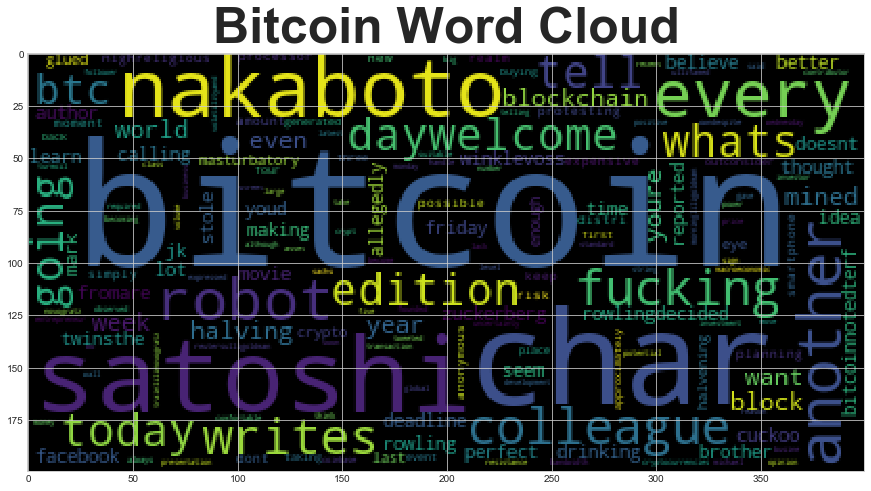

In [49]:
# Generate the Bitcoin word cloud
wc = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

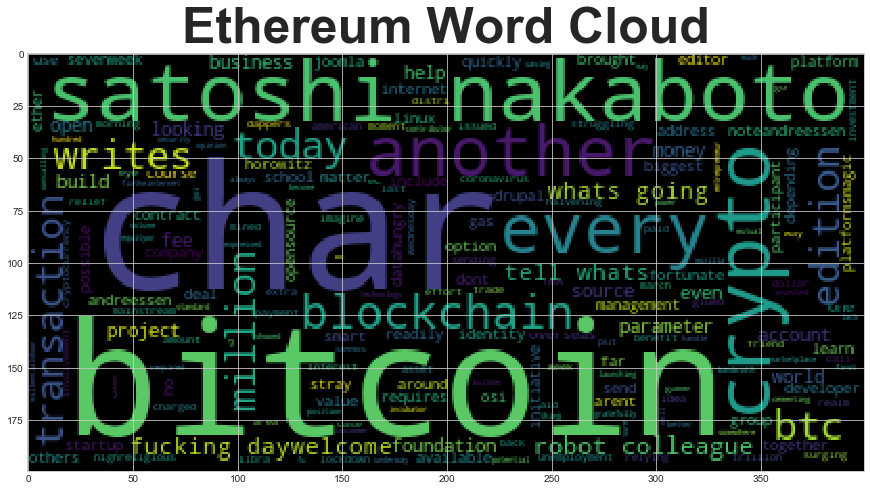

In [50]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [34]:
import spacy
from spacy import displacy

In [35]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [36]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [38]:
# Concatenate all of the bitcoin text together
btc_content = ' '.join(btc_sentiment_df['content'])

In [39]:
# Run the NER processor on all of the text
doc= nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [40]:
# Render the visualization
displacy.render(doc, style='ent')

In [41]:
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

J.K. Rowling PERSON
Bitcoin GPE
The Cuckoos Calling WORK_OF_ART
Friday DATE
The Winklevoss WORK_OF_ART
Mark Zuckerberg PERSON
Facebook ORG
Deadline PERSON
this week DATE
+2657 ORG
the last few weeks DATE
blockchain GPE
new bitcoin LOC
first ORDINAL
Bitcoin GPE
2009 DATE
three CARDINAL
210,000 CARDINAL
every four years DATE
Bitcoin GPE
Reuters
 ORG
Goldman Sachs ORG
five CARDINAL
bitcoin GPE
Wednesday DATE
Goldman ORG
Michael Novogratz PERSON
Monday DATE
bitcoin GPE
$10,000 resistance MONEY
Novogratz PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
bitcoin GPE
2012 DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
2020 DATE
a big year DATE
Bitcoin GPE
Bitcoin GPE
Bitcoin PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERS

---

## Ethereum NER

In [42]:
# Concatenate all of the bitcoin text together
eth_content = ' '.join(eth_sentiment_df['content'])

In [43]:
# Run the NER processor on all of the text
doc= nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [44]:
# Render the visualization
displacy.render(doc, style='ent')

In [45]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Andreessen Horowitzs ORG
Crypto Startup School ORG
45 CARDINAL
U.S. GPE
seven-week DATE
Andreessen Ho PERSON
Ether PERSON
The Linux Foundation ORG
Drupal Foundation ORG
OSI ORG
millions CARDINAL
Americans NORP
$2 trillion dollar MONEY
Relief ORG
Ec ORG
the last few weeks DATE
blockchain GPE
new bitcoin LOC
133 MONEY
$2.5 million MONEY
$2.5 million MONEY
Wednesday DATE
morning TIME
Dapper ORG
Libra GPE
March DATE
1500 CARDINAL
well over a hundred CARDINAL
the Mozilla Builders Incubator ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Blockchain GPE
first ORDINAL
blockchain GPE
Bitcoin GPE
Bitcoin PERSON
